## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
sns.set()

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Load the Data

In [2]:
preprocessed_data = pd.read_csv('loan_preprocessed.csv', index_col=0)

In [3]:
preprocessed_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,all_assets,income_per_person,debt_income_ratio,debt_assets_ratio,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000,3.200000e+06,3.114583,0.589744,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000,4.100000e+06,2.975610,0.717647,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000,2.275000e+06,3.263736,0.514731,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,52700000,2.050000e+06,3.743902,0.582543,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,55000000,1.633333e+06,2.469388,0.440000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,7400000,1.666667e+05,2.300000,0.310811,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,20000000,3.300000e+06,3.424242,0.565000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,39000000,2.166667e+06,3.676923,0.612821,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,28800000,2.050000e+06,3.121951,0.444444,1


### Split the data

In [4]:
unscaled_x = preprocessed_data.iloc[:, :-1]
unscaled_y = preprocessed_data.iloc[:, 15:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(unscaled_x, unscaled_y, test_size=0.2, random_state=77)

In [6]:
X_train.shape, X_test.shape

((3415, 15), (854, 15))

In [7]:
# save test data separately
test_data = X_test
test_data['target'] = y_test
test_data.to_csv('test_data.csv')

### Scale the data

In [8]:
loan_scaler = StandardScaler()
loan_scaler.fit(X_train)

StandardScaler()

In [9]:
x_scaled = loan_scaler.transform(X_train)
X_train_scaled = pd.DataFrame(x_scaled, columns=X_train.columns)

### Multicollinearity assesment

In [10]:
def check_vif(train):
  vif = pd.DataFrame()
  vif["feature"] = train.columns
  vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
  return vif

In [11]:
vifs = check_vif(X_train_scaled)
vifs.sort_values(by='VIF', ascending=False)

C:\Users\Татьяна\Desktop\GitHub\Data-Analysis\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,luxury_assets_value,inf
8,commercial_assets_value,inf
11,all_assets,inf
10,bank_asset_value,inf
7,residential_assets_value,inf
3,income_annum,49.048262
4,loan_amount,27.946150
13,debt_income_ratio,6.257959
14,debt_assets_ratio,4.930141
12,income_per_person,3.586987


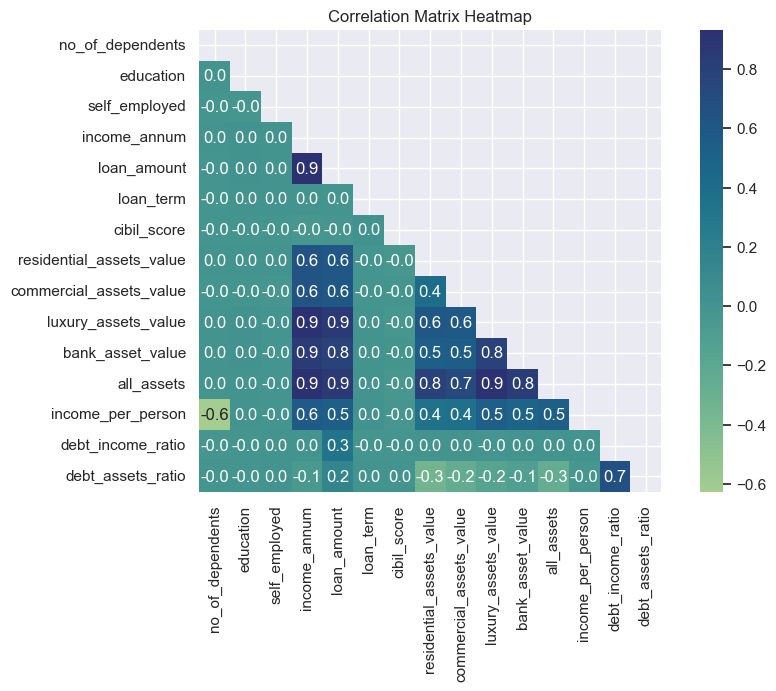

In [12]:
plt.figure(figsize=(10, 6))
correlation_matrix = X_train_scaled.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,  mask=mask, cmap="crest", annot=True, fmt=".1f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Let's remove loan_amount and income_annum  as they have the highest VIF values, exhibit strong correlations with other variables, and are indirectly represented in the debt_income_ratio column. 
Let's also drop assets - 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value' as far as they are in all_assets

In [13]:
X_train_scaled.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'all_assets', 'income_per_person', 'debt_income_ratio',
       'debt_assets_ratio'],
      dtype='object')

In [14]:
X_train_final = X_train_scaled.drop(['loan_amount', 'income_annum', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], axis=1)
vifs = check_vif(X_train_final)
vifs.sort_values(by='VIF', ascending=False)

,feature,VIF
6,income_per_person,3.389582
5,all_assets,2.344945
0,no_of_dependents,2.342121
8,debt_assets_ratio,2.214103
7,debt_income_ratio,1.987790
4,cibil_score,1.001621
3,loan_term,1.001435
1,education,1.001204
2,self_employed,1.000709


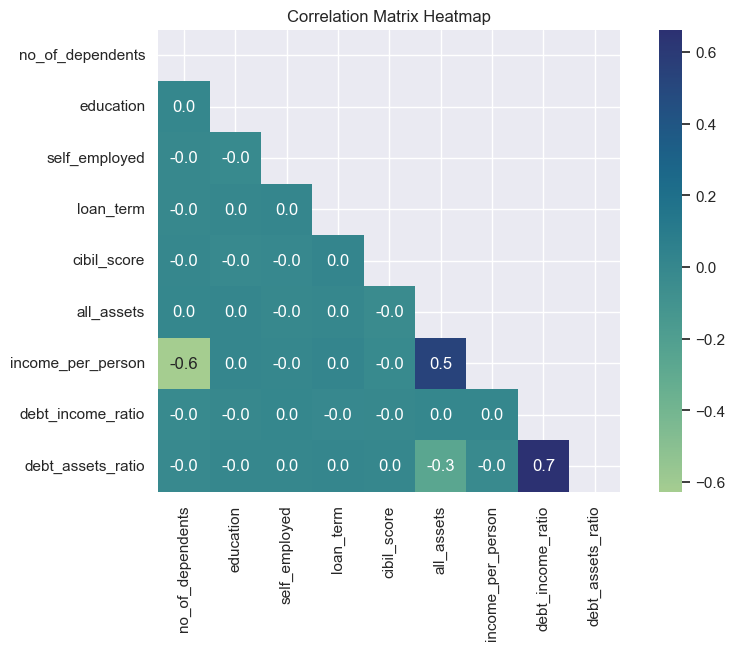

In [15]:
plt.figure(figsize=(10, 6))
correlation_matrix = X_train_final.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,  mask=mask, cmap="crest", annot=True, fmt=".1f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
X_train_final = X_train_final.reset_index(drop=True)
y_train_final = y_train.reset_index(drop=True)

## Preliminary model

In [17]:
x1 = sm.add_constant(X_train_final)
regr = sm.Logit(y_train_final, x1).fit()

Optimization terminated successfully.
         Current function value: 0.211034
         Iterations 9


In [18]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                          Logit   Df Residuals:                     3405
Method:                           MLE   Df Model:                            9
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.6805
Time:                        10:24:13   Log-Likelihood:                -720.68
converged:                       True   LL-Null:                       -2255.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9039      0.098     19.410      0.000       1.712       2.096
no_of_dependents      0.0653      0.102      0.638      0.524      -0.135       0.266
education             0.0946      0.068      1.393      0.164      -0.039       0.228
self_employed         0.0181      0.068      0.268      0.789      -0.114       0.151
loan_term            -0.9194      0.076    -12.147      0.000      -1.068      -0.771
cibil_score           4.4193      0.168     26.229      0.000       4.089       4.749
all_assets           -0.2203      0.102     -2.150      0.032      -0.421      -0.019
income_per_person     0.1657      0.118      1.402      0.161      -0.066       0.397
debt_income_ratio     0.8890      0.103      8.609      0.000       0.687       1.091
debt_assets_ratio    -0.4280      0.105     -4.066      0.000      -0.634      -0.222
=====================================================================================
"""

In Model the p-values for

- 'no_of_dependents',
- 'self_employed',
- 'education'

are greater than 0.05, suggesting that their coefficients are not significantly different from zero and do not add explanatory power to the model. Therefore, I will remove them

In [19]:
def confusion_matrix(data, actual_values, model):
    # Get predictions
    pred_values = model.predict(data)
    
    # Ensure binary predictions
    pred_values = (pred_values >= 0.5).astype(int)
    
    # Check dimensions
    actual_values = np.array(actual_values).flatten()
    pred_values = np.array(pred_values).flatten()
    
    # Ensure same length
    assert len(actual_values) == len(pred_values), "Length mismatch between actual and predicted values."
    
    # Compute confusion matrix
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pred_values, bins=[bins, bins])[0]
    
    # Accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    accuracy = format(accuracy, '.3f')
    print(f'Model Accuracy: {accuracy} %')
    df = pd.DataFrame(data=cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    
    return df

In [20]:
confusion_matrix(x1, y_train_final, regr)

Model Accuracy: 0.918 %


,Predicted 0,Predicted 1
Actual 0,1130.0,144.0
Actual 1,137.0,2004.0


In [21]:
# Remove insignificant for model variables

X_train_final = X_train_final.drop(['no_of_dependents', 'self_employed', 'education'], axis=1).reset_index(drop=True)
y_train_final = y_train_final.reset_index(drop=True)
X_train_final 

,loan_term,cibil_score,all_assets,income_per_person,debt_income_ratio,debt_assets_ratio
0,-0.169269,-0.880586,0.918271,-0.016889,-0.049343,-0.074066
1,0.886216,-0.996827,-0.080706,-0.554663,1.038473,1.219818
2,0.534388,-1.304868,-0.049809,0.771011,-1.369716,-1.646578
3,-1.224755,1.269885,-0.734675,-0.529650,-1.032865,-0.670426
4,-1.224755,-1.403673,-1.610066,-0.999889,1.156667,2.498346
...,...,...,...,...,...,...
3410,1.238045,-0.165700,-1.434988,-0.679726,-0.447386,-0.557852
3411,-0.169269,1.583737,-1.146624,-0.529650,0.539106,1.077945
3412,0.886216,1.694167,1.711273,0.620934,0.357071,-0.032315
3413,-0.872926,1.717415,-1.589469,-0.992385,-1.650425,-0.912744


## Final model

In [22]:
# Run new regression
regr_f = LogisticRegression()
regr_f.fit(X_train_final, y_train_final)

C:\Users\Татьяна\Desktop\GitHub\Data-Analysis\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
regr_f.score(X_train_final, y_train_final)

0.9200585651537335

### Finding the intercept and coefficients

In [24]:
regr_f.intercept_

array([1.84791327])

In [25]:
coeff_table = pd.DataFrame(data = np.transpose(regr_f.coef_), index = X_train_final.columns, columns = ['Coefficient'])

**For logistic regression, the effect of a predictor variable on the odds of the target event is given by the exponential of the coefficient. Let's add them to the table**

In [26]:
coeff_table['Odds_ratio'] = np.exp(coeff_table.Coefficient)
coeff_table.sort_values('Odds_ratio', ascending=False)

,Coefficient,Odds_ratio
cibil_score,4.281217,72.328401
debt_income_ratio,0.835154,2.305168
income_per_person,0.101141,1.106432
all_assets,-0.171165,0.842683
debt_assets_ratio,-0.381359,0.682933
loan_term,-0.882706,0.413662


- CIBIL Score has the most substantial positive impact on the outcome, with a very high odds ratio.
- Debt-to-Income Ratio moderately increases the odds of the positive outcome.
- Income per Person has a small positive effect.
- All Assets, Debt-to-Assets Ratio, and Loan Term negatively affect the odds, with Loan Term having the strongest negative impact.

**The CIBIL Score and Loan Term seem to have a substantial impact, possibly indicating that longer loan terms and lower credit scores might negatively influence approval chances, while having a higher debt-income ratio might increase the odds.**

### Model accuracy

In [27]:
results = confusion_matrix(X_train_final, y_train_final, regr_f)
results

Model Accuracy: 0.920 %


,Predicted 0,Predicted 1
Actual 0,1131.0,143.0
Actual 1,130.0,2011.0


In [28]:
m_rate = (results.iloc[0,1]+ results.iloc[1, 0]) / (results['Predicted 0'].sum() + results['Predicted 1'].sum())

print(f'Misclassification rate: {m_rate:.3f}')

Misclassification rate: 0.080


In [29]:
precision = results.iloc[0,0] / (results.iloc[0,0] + results.iloc[0,1])
print(f'Model Precision: {precision:.3f}')

Model Precision: 0.888


In [30]:
recall = results.iloc[0,0] / (results.iloc[0,0] + results.iloc[1,0])
print(f'Model recall: {recall:.3f}')

Model recall: 0.897


In [31]:
F1_Score = 2*precision*recall/(precision+recall)
print(f'F1 Score: {F1_Score:.3f}')

F1 Score: 0.892


## Testing the model

In [32]:
actual_columns = X_train_final.columns

In [54]:
test_data = pd.read_csv('test_data.csv', index_col=0)

In [55]:
x_test = test_data.iloc[:, :-1]
y_test = test_data['target']

In [56]:
x_test_scaled = loan_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(data=test_scaled, columns=x_test.columns)[actual_columns]

### Accuracy check

In [57]:
test_results = confusion_matrix(x_test_scaled, y_test, regr_f)
test_results

Model Accuracy: 0.891 %


,Predicted 0,Predicted 1
Actual 0,282.0,57.0
Actual 1,36.0,479.0


In [58]:
regr_f.score(x_test_scaled, y_test)

0.8911007025761124

High Accuracy: The model has a high accuracy for both the training  and test sets, suggesting it can distinguish between approved and not-approved loans effectively.

Low Misclassification: A relatively low misclassification rate (8.8%) on the test set indicates that the model's predictions are reliable.

The logistic regression model for loan approval performs well, showing strong predictive capability on both training and test datasets with minimal overfitting. While the false positive and false negative counts are relatively low, depending on the business context (e.g., the cost of a wrongly approved loan), additional steps like adjusting decision thresholds or adding more informative features could be considered to reduce errors further

### Predicted Proba check

In [60]:
test_data['predicted_result'] = regr_f.predict(x_test_scaled)

In [61]:
test_data['predicted_proba'] = regr_f.predict_proba(x_test_scaled)[:, 1:] 

In [62]:
test_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,all_assets,income_per_person,debt_income_ratio,debt_assets_ratio,target,predicted_result,predicted_proba
2180,2,0,1,4900000,13800000,2,586,9900000,1400000,9900000,7000000,28200000,1.633333e+06,2.816327,0.489362,1,1,0.934237
65,1,1,0,4100000,10300000,12,364,9500000,6100000,14900000,2800000,33300000,2.050000e+06,2.512195,0.309309,0,0,0.012130
2755,0,1,0,8600000,31800000,2,895,22600000,15900000,19600000,5100000,63200000,8.600000e+06,3.697674,0.503165,1,1,0.999991
2196,5,0,1,2300000,4700000,18,592,1600000,3900000,6200000,2800000,14500000,3.833333e+05,2.043478,0.324138,1,0,0.431598
4258,5,1,1,9700000,22600000,16,346,23500000,12900000,26800000,13000000,76200000,1.616667e+06,2.329897,0.296588,0,0,0.002256


In [69]:
test_data.columns[:-2]

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'all_assets', 'income_per_person', 'debt_income_ratio',
       'debt_assets_ratio', 'target'],
      dtype='object')

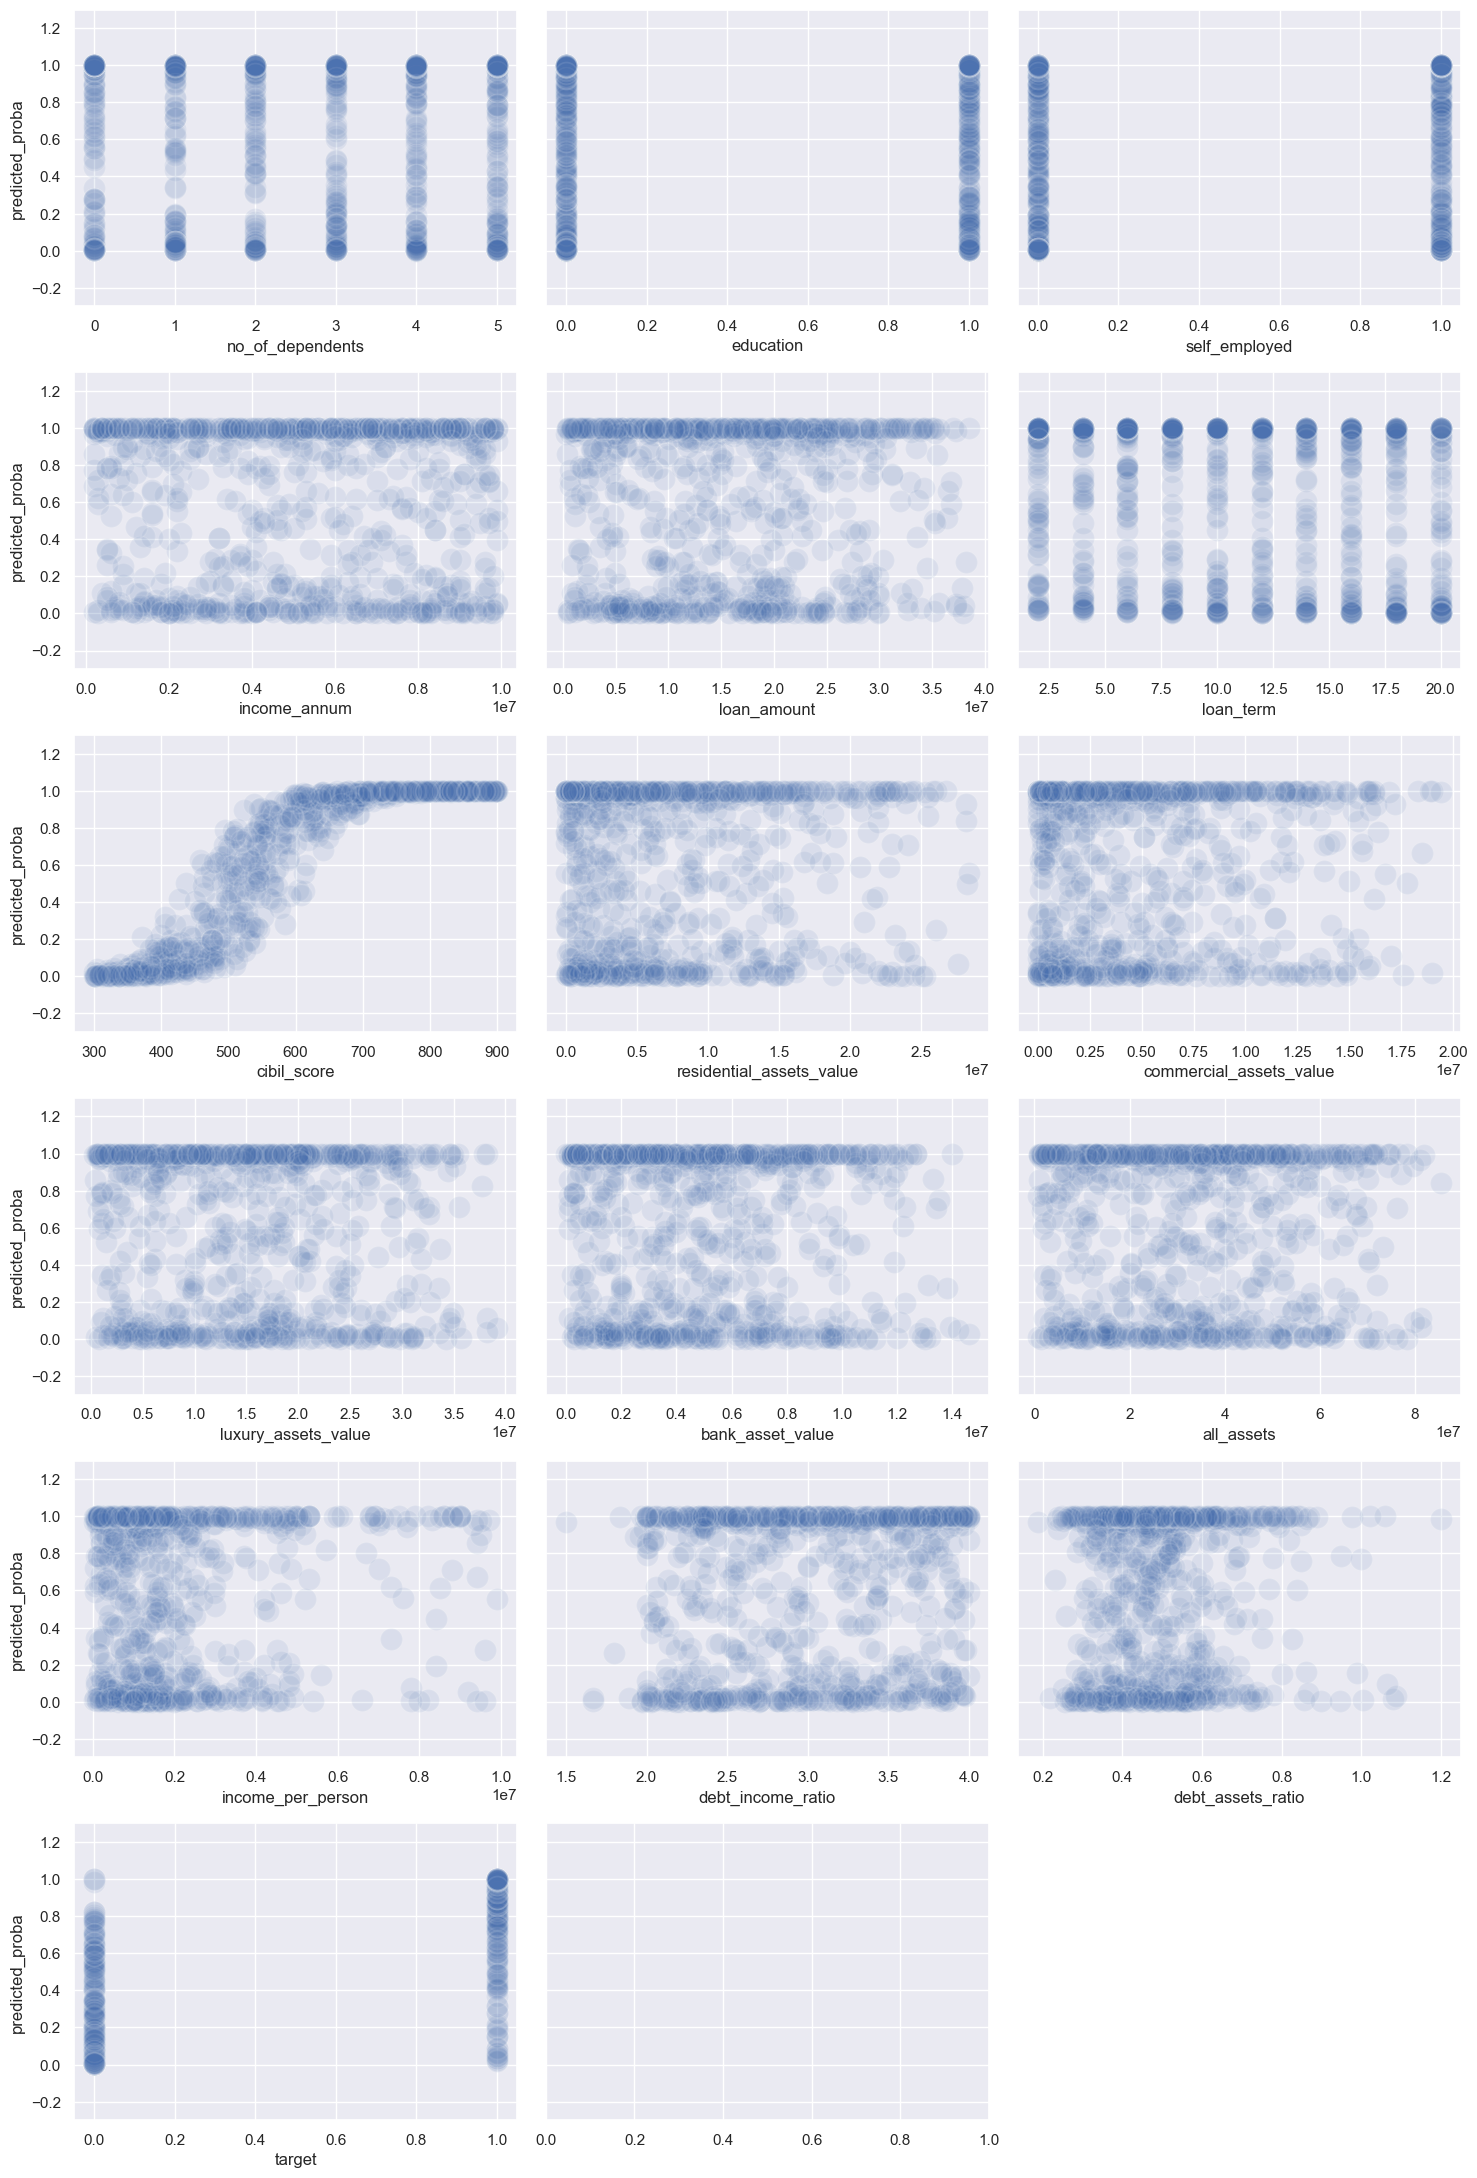

In [70]:
num_cols = 3
num_rows = int(np.ceil((len(test_data.columns)) - 1 / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 65), sharey=True)

# Flatten the axes to a 1D array for easier indexing
axes = axes.flatten()

# Plot each column
for i, col in enumerate(test_data.columns):
    if col != 'predicted_result':
        sns.scatterplot(data=test_data, x=col, y='predicted_proba', alpha=0.1, s=250, ax=axes[i])
        axes[i].set_ylabel('predicted_proba')
        axes[i].set_xlabel(col)
        axes[i].set_ylim(-0.3, 1.3)
        axes[i].legend([], [], frameon=False)

# Remove any empty subplots
for i in range(len(test_data.columns) - 1, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Save the model

In [71]:
import pickle

In [72]:
with open ('model', 'wb') as file:
    pickle.dump(regr_f, file)

In [73]:
with open ('scaler', 'wb') as file:
    pickle.dump(loan_scaler, file)